In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
titanic = pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Proposing questions
数据集里面有多列，主观上感觉是Pclass, Sex, Age 这三个因素会影响是否生活，因此提出问题:Pclass, Sex, Age是否会影响Titanic生还率？

# Data wrangling
    1) 补全missing value,
    2) 拆分Name column， 可以将Name拆分为： First name,last name (using vectorized str.split (https://stackoverflow.com/questions/37333299/splitting-a-column-by-delimiter-pandas-python)

In [3]:
titanic.info()
# 可以看出，总共891条记录，Age Series 有177条记录missing，因此Drop这些行不可取，可以使用平均数来填充且取整


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
age_mean = int(titanic['Age'].mean())
print (age_mean)
titanic['Age'] = titanic['Age'].fillna(age_mean)
titanic

29


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# 因为有一个column包含乘客性别，所以使用split将Name拆分开为Fname&Lname column
split_names = titanic['Name'].str.split(',',expand=True)
titanic['Lname'] = split_names[0]
titanic['Fname'] = split_names[1].str.split('.',expand=True)[1]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Lname,Fname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry


In [6]:
# 打印df shape, 数据类型为tuple
print (titanic.shape)

# 提取出有可能影响生还率的变量及Survived column
titanic_factors = titanic[['Survived','Pclass','Sex','Age']]
titanic_factors.head()

(891, 14)


,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


Survived
0    549
1    342
Name: Survived, dtype: int64


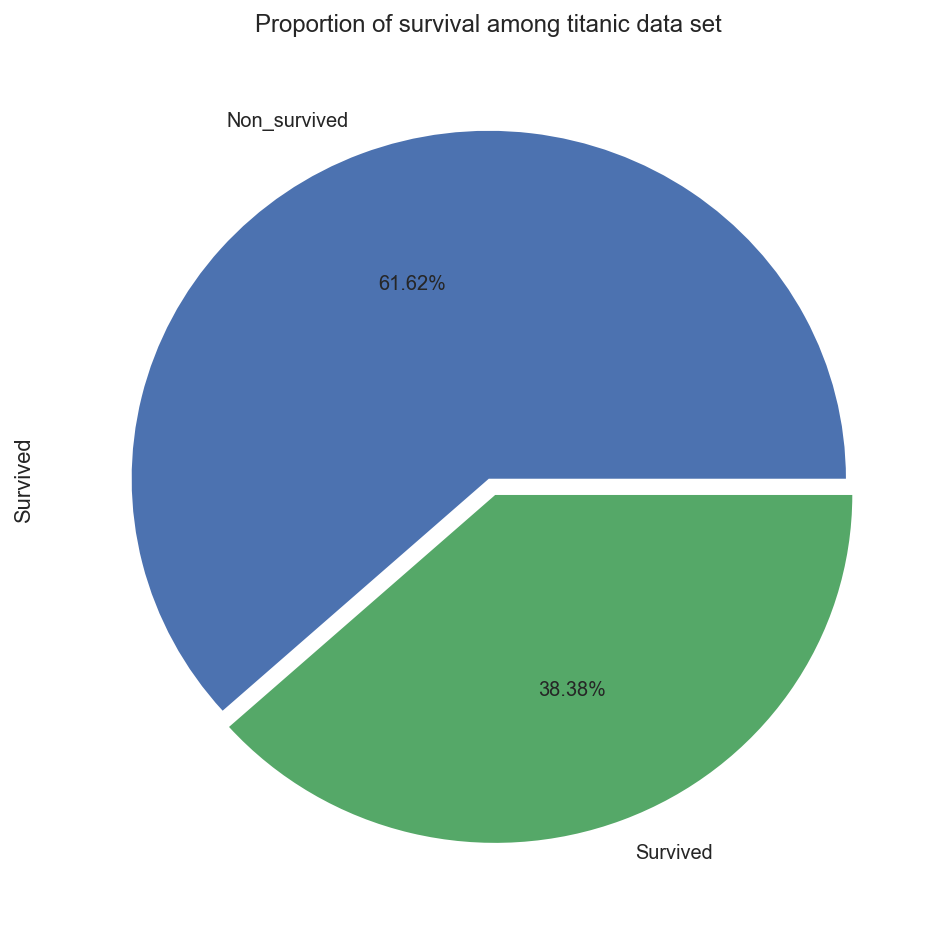

In [7]:
# 进行单变量分析之前可以先观察一下整个数据集的存活情况

survived = titanic_factors.groupby(['Survived'])['Survived'].count()
print (survived)
explode = (0,0.05)
age_axe_pie = survived.plot(kind='pie',
                            subplots = True,
                            autopct= '%0.2f%%',
                            labels = ['Non_survived','Survived'],
                            explode = explode,
                            figsize=(8,8))[0]
age_axe_pie.set_title('Proportion of survival among titanic data set')

从上图可以看出，整个数据集包括891位乘客，而整理幸存率不到39%。因此以下我们要研究有哪些因素影响了生还率

# Exploring Phase 
## 单变量分析
### 1）Pclass(船舱级别)
 

In [7]:
#根据factor, 编写计算生还率函数，代码复用高
def cal_survival_rate(factor):
    titanic_factor = titanic_factors[['Survived',factor]]
    #group titaninc_factor by each factor,
    factor_group = titanic_factor.groupby(factor)
    
    #count dead or survived
    survived_group_factor = titanic_factor[titanic_factor['Survived'] == 1].groupby(factor).count()
    dead_group_factor = titanic_factor[titanic_factor['Survived'] == 0].groupby(factor).count()
#   total = factor_group.count()
#   survival = factor_group.sum()
    total = pd.concat([dead_group_factor.rename(columns={'Survived':'Dead'}),survived_group_factor], axis=1)

    # 使用平均数来计算存活率
    survival_rate = factor_group.mean()
    
    print (total)
    print (survival_rate.rename(columns={'Survived':"Survival_Rate"}))
    
    plt.figure(figsize=(14,6))
    f, (ax1,ax2) = plt.subplots(1,2,sharex=True)
    ax1.set_title(factor +' & ' +"Count")
    ax1.set_ylabel('Number of Passengers')
    ax2.set_title(factor +' & ' + "Survival Rate")
    ax2.set_ylabel('Survival Rate')
    f.set_size_inches((20,8))
    
    #Plot Passenger survived or not chart
    total.plot(kind='bar',stacked = True,ax = ax1)
    
    #Plot survival rate
    survival_rate.plot(kind='bar', ax = ax2)
    return survival_rate

        Dead  Survived
Pclass                
1         80       136
2         97        87
3        372       119
        Survival_Rate
Pclass               
1            0.629630
2            0.472826
3            0.242363


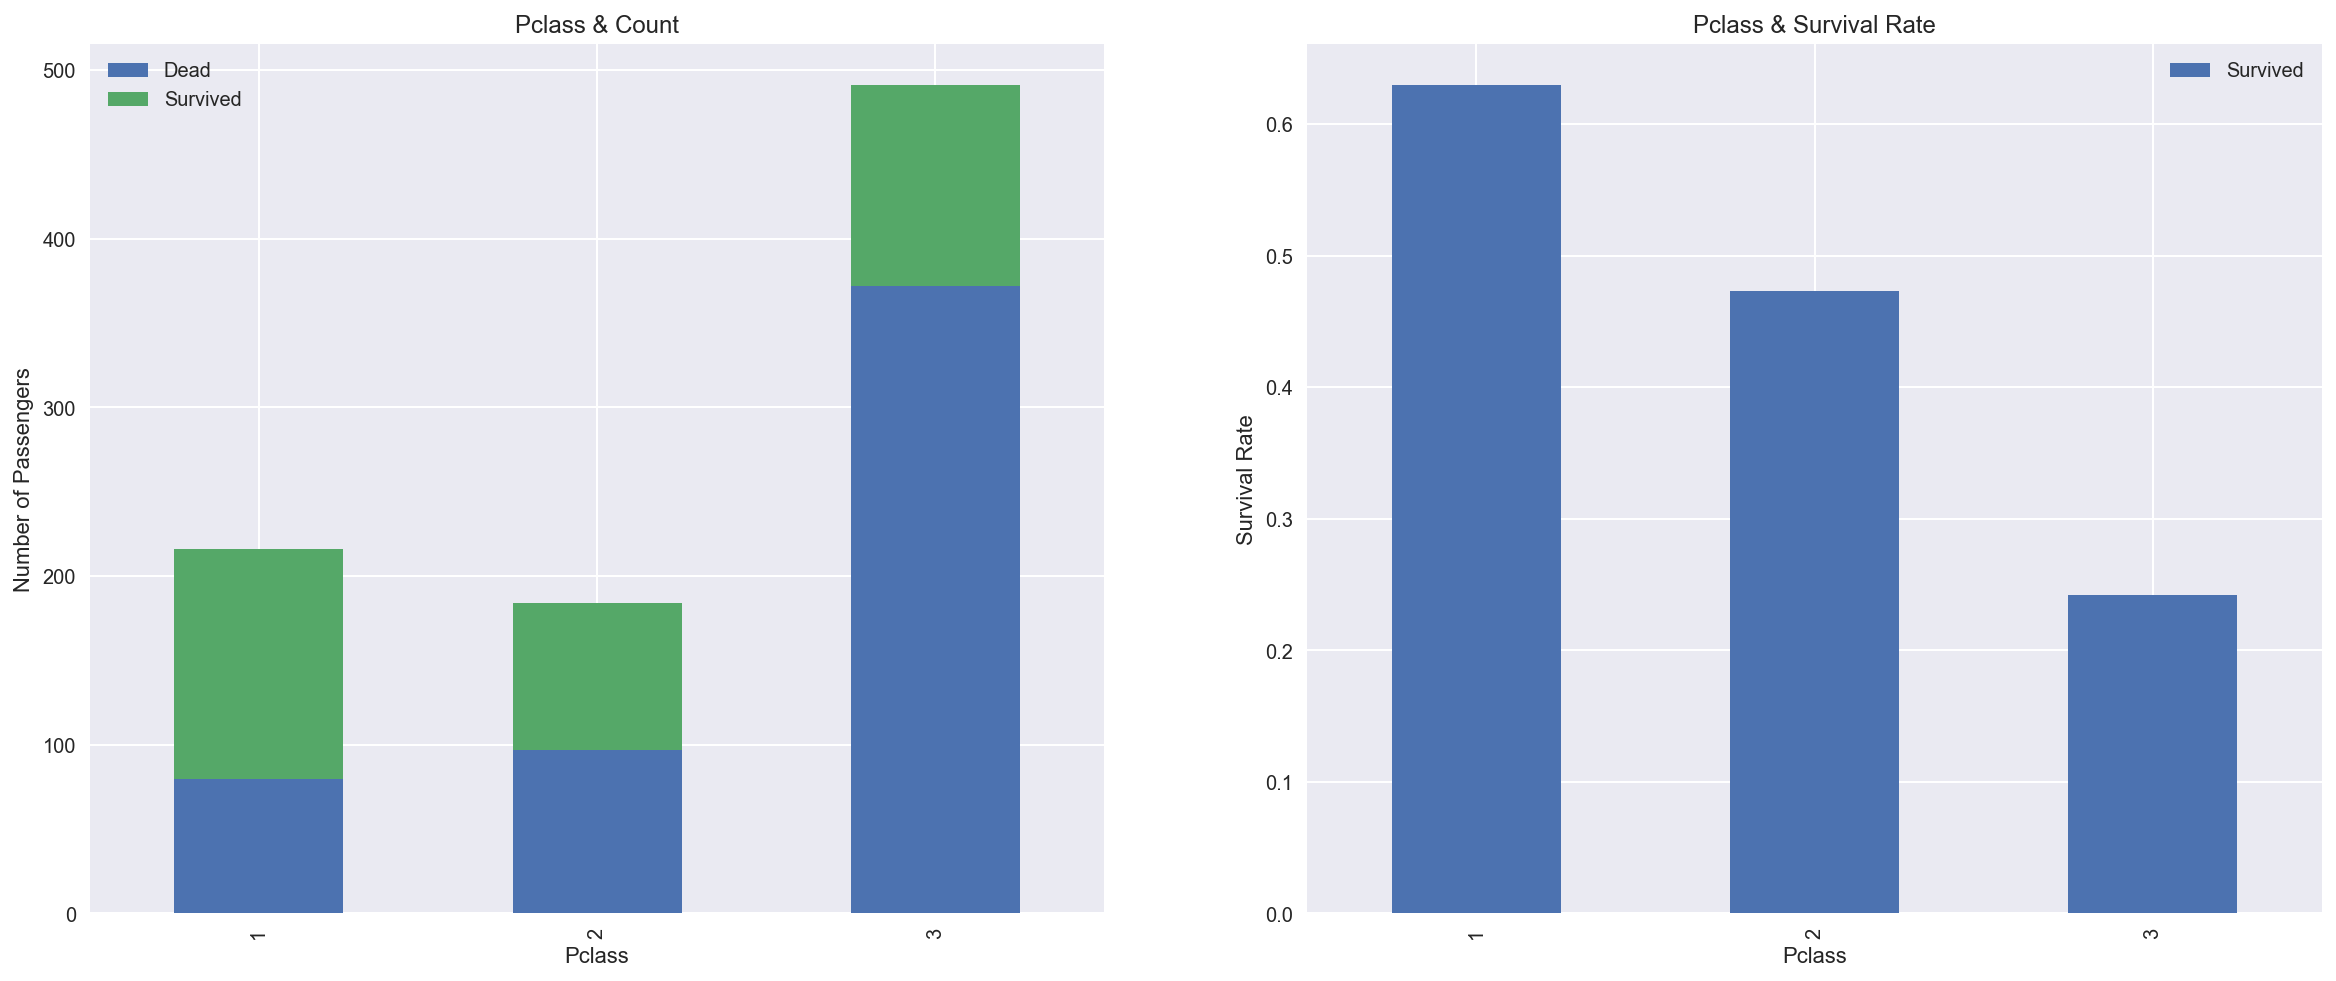

In [8]:
# 测试函数是否是适用于Pclass
pclass_survival_rate = cal_survival_rate('Pclass')

### 1）Pclass 分析小结
通常来说，船舱的位置越低，生还机会相对较小，从上图可以看出，Survival_Rate(pclass=1) > Survival_Rate(pclass=2) >Survival_Rate(pclass=3),而且船舱1中女性的生还人数多于男性， 因此可以船舱级别是影响生还可能的因素之一。 

### 2）Sex(性别)


        Dead  Survived
Sex                   
female    81       233
male     468       109
        Survival_Rate
Sex                  
female       0.742038
male         0.188908


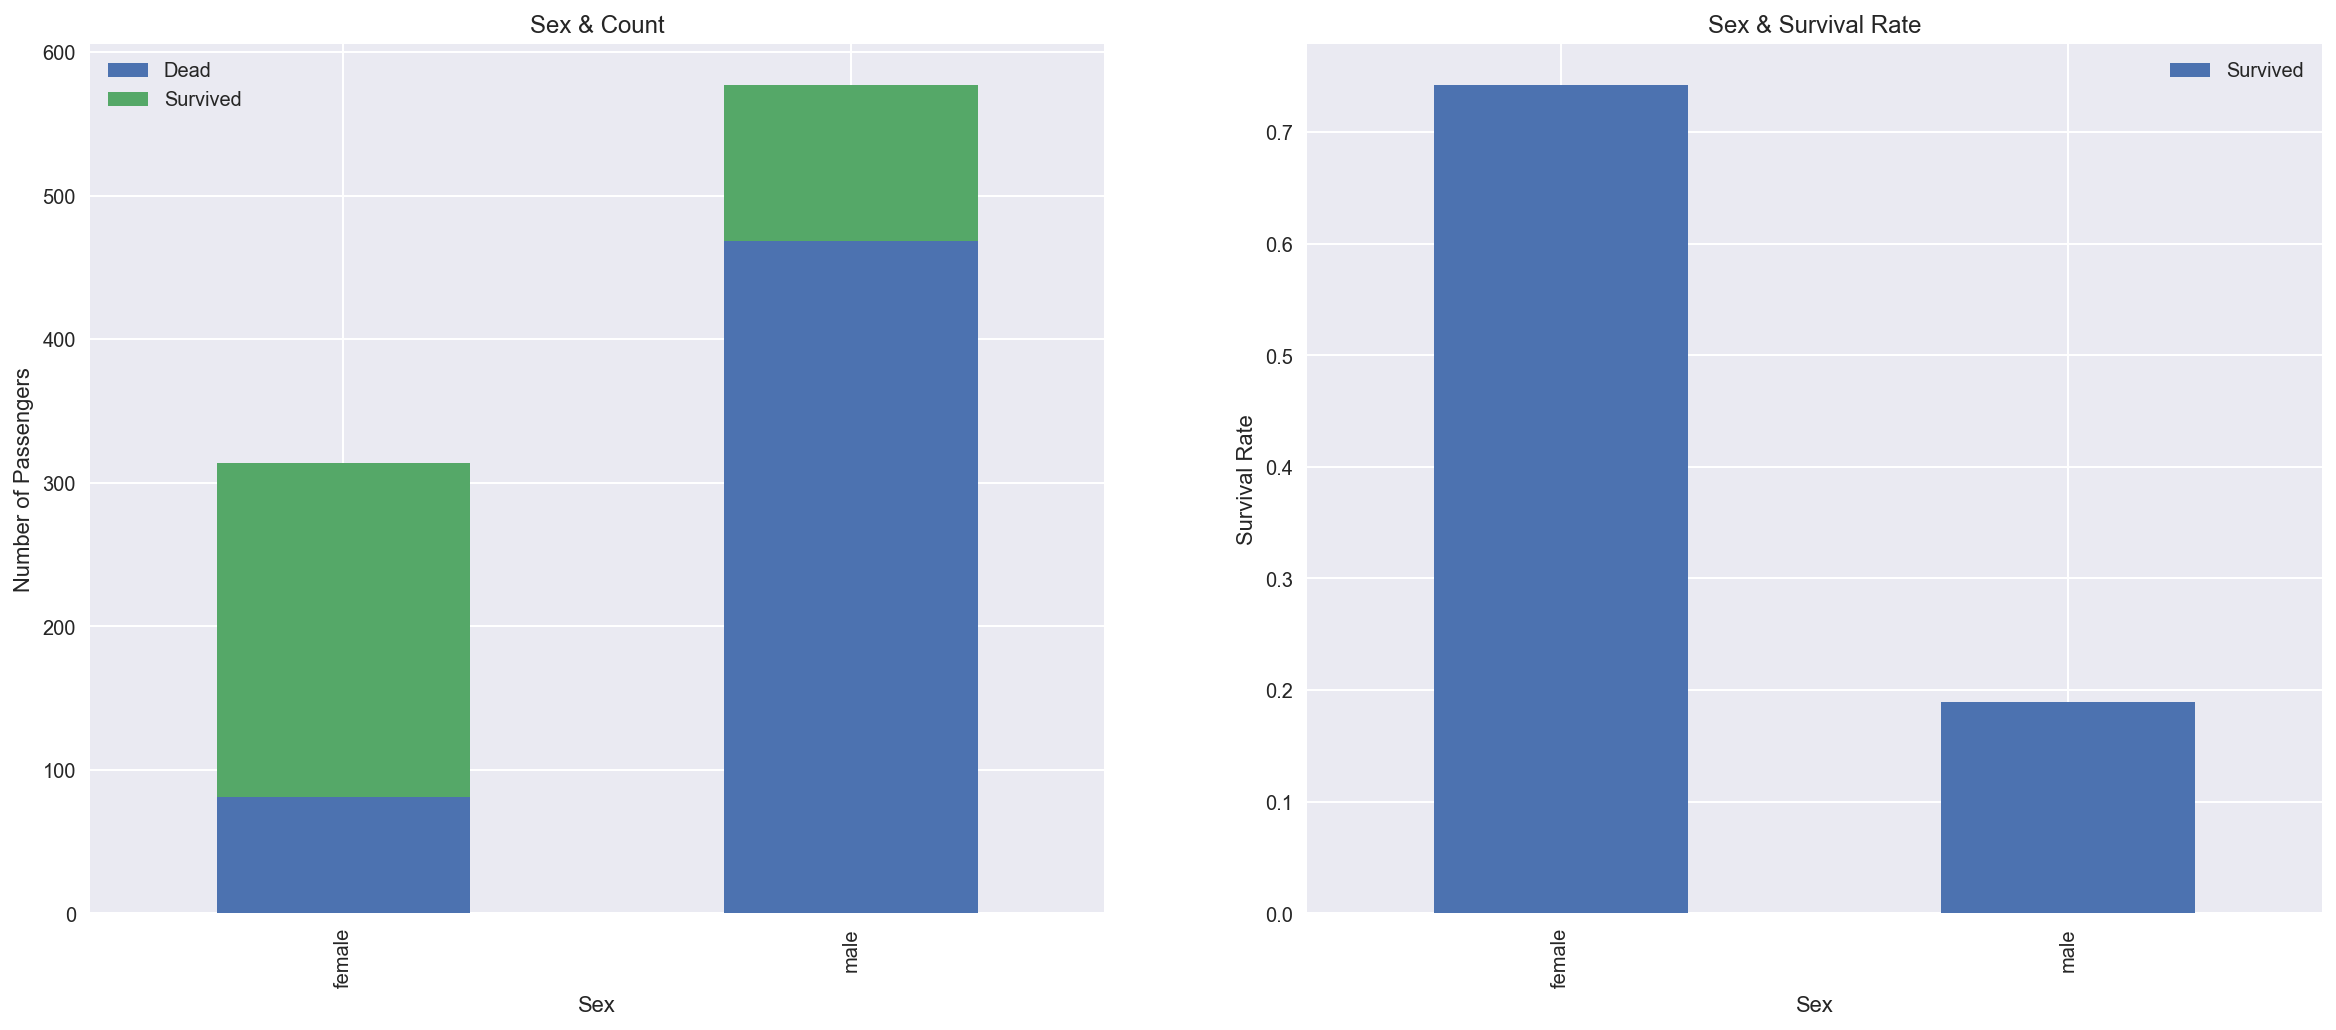

In [9]:
sex_survival_rate = cal_survival_rate("Sex")



### 2）Sex 分析小结
通常来说，男性的体格、体力等方面要由于女性，因此可以推测男性的生还率要高于女性。但是观察上图，男性的人数大致高于女性一倍，而女性的生活率是男性生还率的三倍不止，因此可以猜想，灾难发生时，有可能是女生优先逃生。

### 3）Age 

In [10]:
titanic_age = titanic_factors[['Survived','Age']]
titanic_age.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [11]:
#https://chrisalbon.com/python/pandas_binning_data.html
#https://stackoverflow.com/questions/47053770/pandas-cut-how-to-convert-nans-or-to-convert-the-output-to-non-categorical
# labels = [ "({0} - {1}]".format(i, i + 10) for i in range(0, 100, 10) ]
# titanic_age['Range'] = pd.cut(titanic_age['Age'],range(0,105,10),include_lowest= False, 
#                               right = True, labels=labels).values.add_categories('missing')
# titanic_age = titanic_age.fillna(value = 'missing')

# titanic_age.head()

# 如上所示，几乎每个船员的年龄都不一致。对着这种类型的Data，可以将其划分在不同的组内，使用pd.cut将Age serie 拆分
bins = np.arange(0,90,10)
titanic_age['Range'] = pd.cut(titanic_age['Age'],bins,include_lowest=False, right=True)
titanic_age.head()



/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Survived,Age,Range
0,0,22.0,"(20, 30]"
1,1,38.0,"(30, 40]"
2,1,26.0,"(20, 30]"
3,1,35.0,"(30, 40]"
4,0,35.0,"(30, 40]"


In [12]:
pd.value_counts(titanic_age['Range'])

(20, 30]    407
(30, 40]    155
(10, 20]    115
(40, 50]     86
(0, 10]      64
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: Range, dtype: int64

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


          Dead  Survived
Range                   
(0, 10]     26        38
(10, 20]    71        44
(20, 30]   271       136
(30, 40]    86        69
(40, 50]    53        33
(50, 60]    25        17
(60, 70]    13         4
(70, 80]     4         1
          Survival_Rate
Range                  
(0, 10]        0.593750
(10, 20]       0.382609
(20, 30]       0.334152
(30, 40]       0.445161
(40, 50]       0.383721
(50, 60]       0.404762
(60, 70]       0.235294
(70, 80]       0.200000


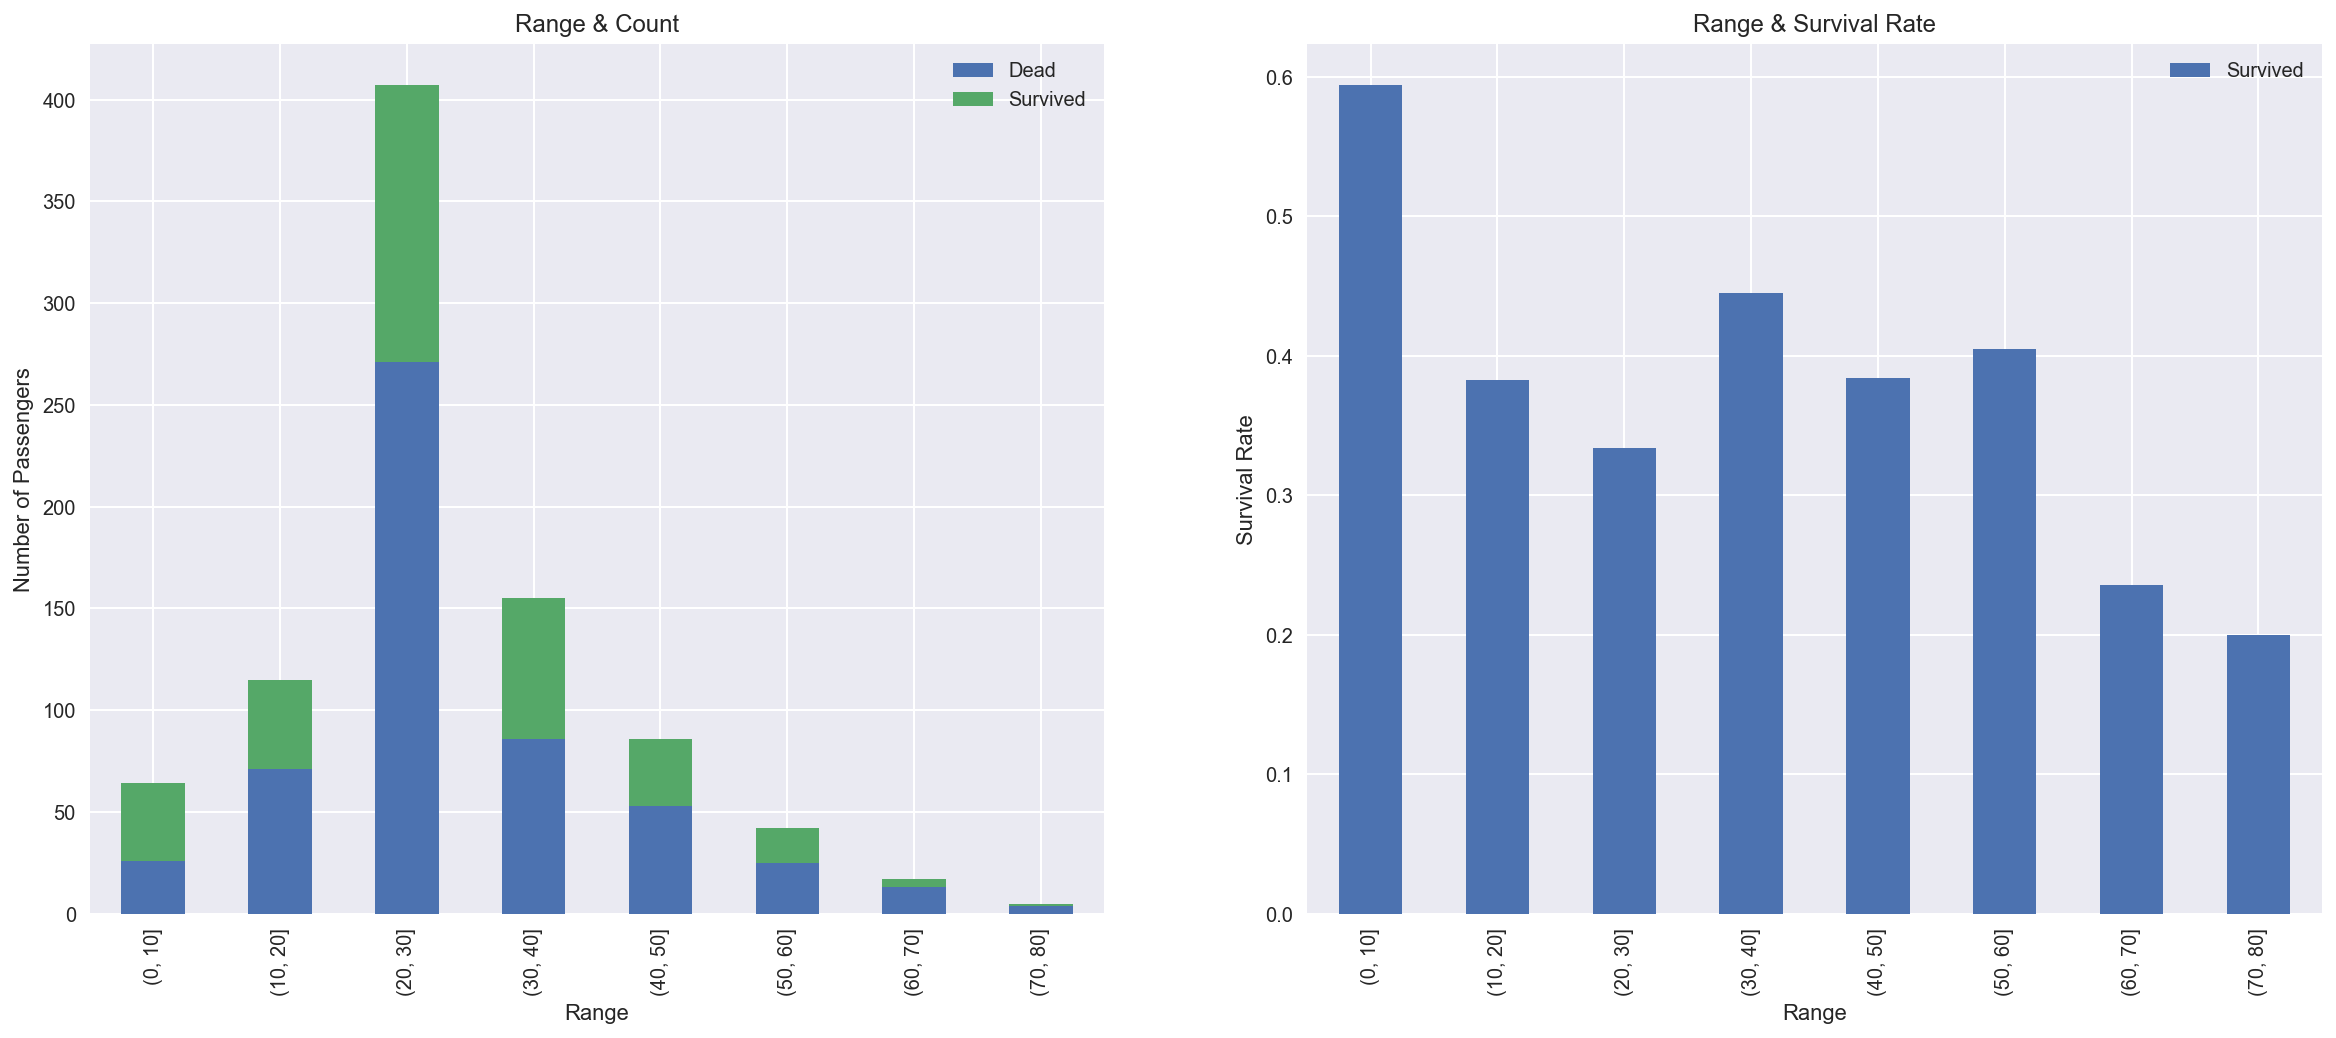

In [13]:
# 因为titanic_factors 不存在新创建的Range series， 因此需要将其加入并且使用cal_survival_rate 函数进行分析
titanic_factors['Range'] = titanic_age['Range']
age_group_survival_rate = cal_survival_rate('Range')

### 3）年龄小结
就各年龄段的生存人数来说，20-30岁生还人数最多，30-40次之，再者0-10岁儿童。 随着年龄组的递增，生还人数也随之减少，符合常理（但也有可能是数据中177条missing的数据由平均年龄29代替，因此增加了该年龄段生还人数）。 在泰坦尼克悲剧发生后，年轻人的逃生率优于老人，0-10岁儿童生还人数多可能是因为之前优先女性逃生并且带着儿童。而看生还率的（0-10）的生存几率最大（超过50%）。
其它年龄段没有特别明显的差异，均小于50%。最低的是老龄人（70-80），生还率仅有20%。但是因为未知年龄的人数较多，177人，因此可能会影响生还率就年龄而言。

## 双变量分析


In [14]:
# 双变量分析
def double_variable(var1,var2):
#     ax1_var1_var2 = titanic_factors.groupby([var1,var2])['Survived'].mean().unstack(level=-1).plot(kind='bar',figsize=(12,6))
#     ax1_var1_var2.set_title(var1 + " && " + var2 + " VS " + "Avg. Survival")
#     ax1_var1_var2.set_ylabel('Avg. Survival')
    plt.figure(figsize=(14,6))
    f, (ax1,ax2) = plt.subplots(1,2,sharex=True)
    ax1.set_title(var1 +' && ' +var2 + " VS " +"Count")
    ax1.set_ylabel('Number of Passengers')
    ax2.set_title(var1 +' && ' + var2 + " VS " + "Survival Rate")
    ax2.set_ylabel('Survival Rate')
    f.set_size_inches((20,8))
    titanic_factors.groupby([var1,var2])['Survived'].mean().unstack().plot(kind='bar',ax = ax2)
    titanic_factors.groupby([var1,var2])['Survived'].count().unstack().plot(kind='bar',ax = ax1)


### 1）Pclass & Sex 

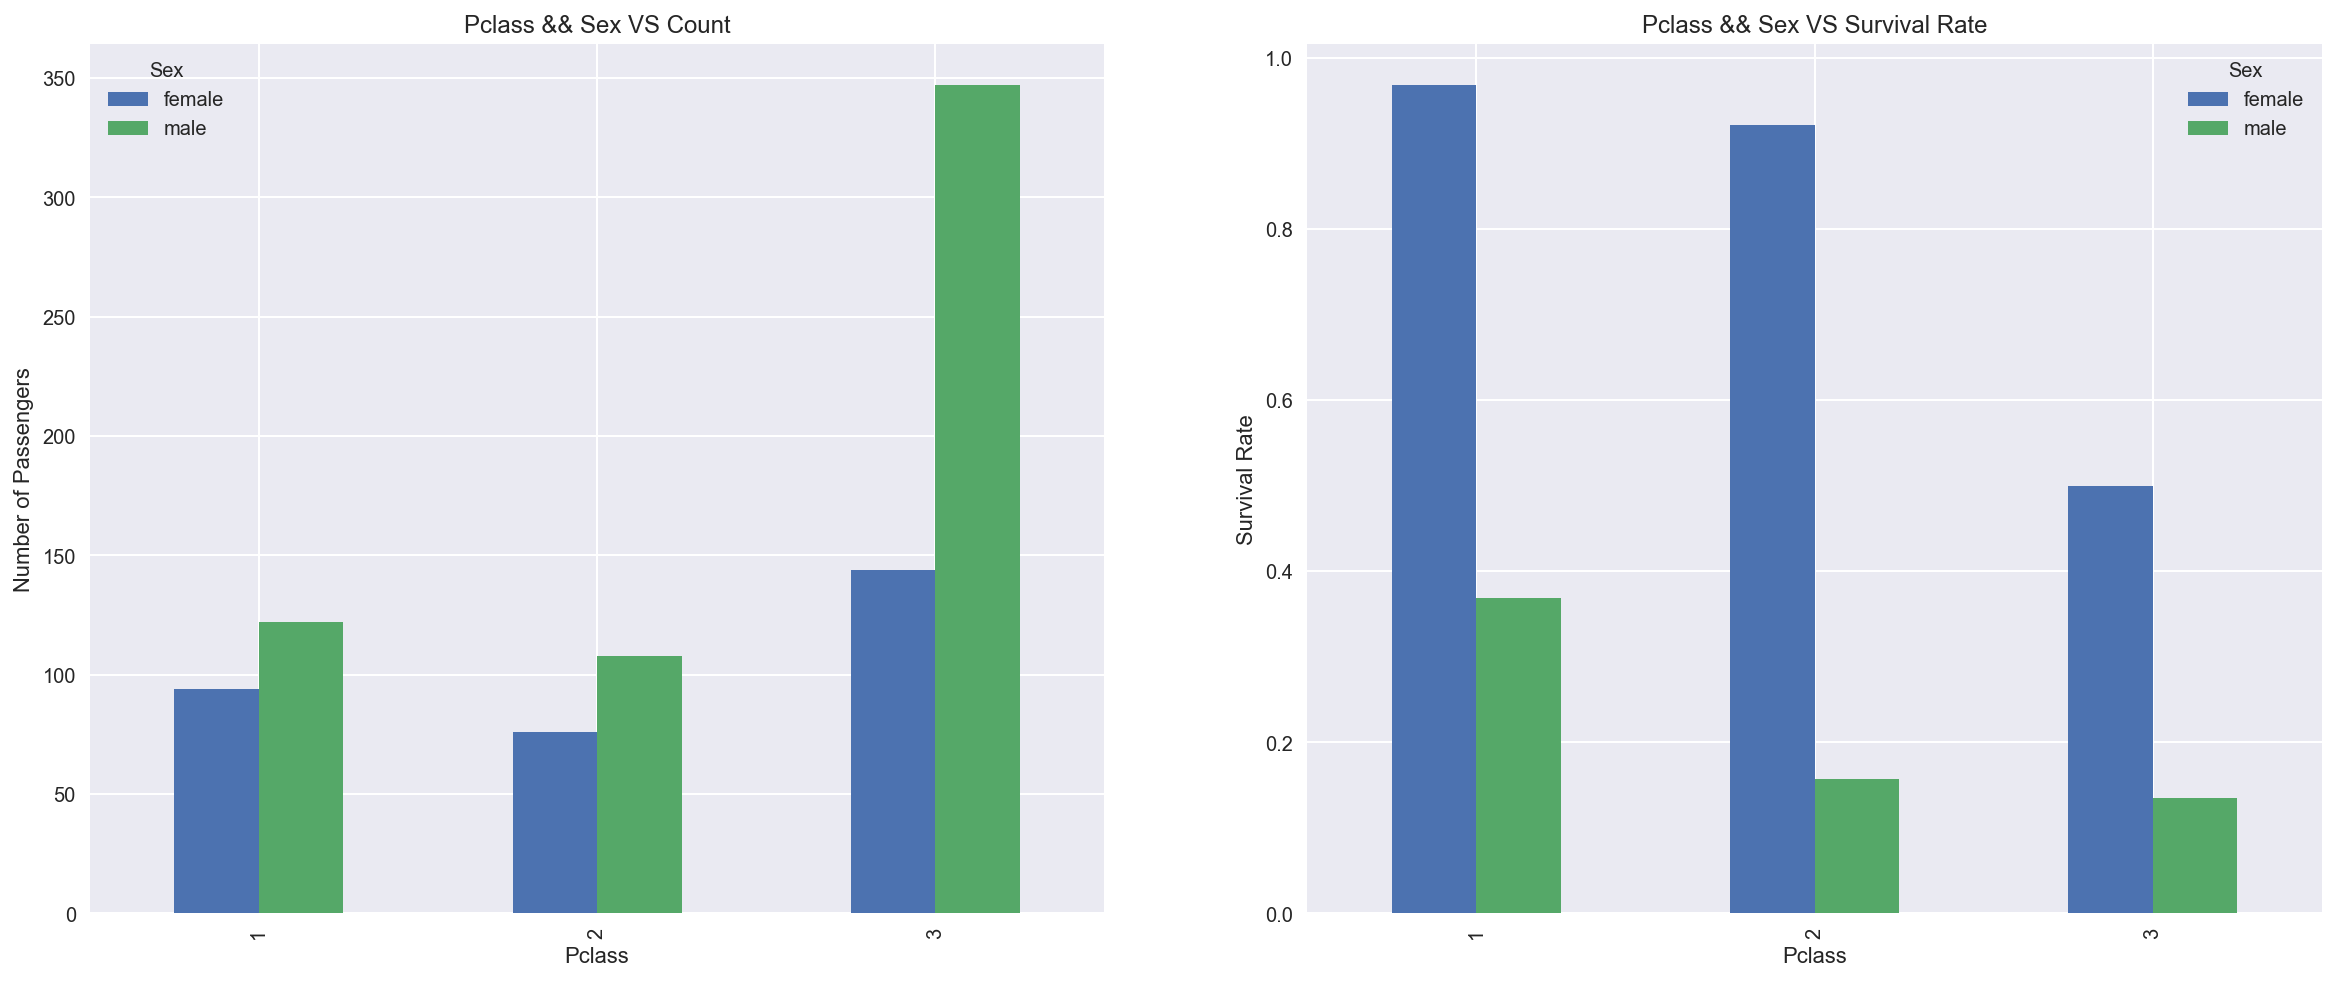

In [15]:
double_variable('Pclass','Sex')

### 1) Pclass & Sex 小结
如上图右图所示，不管是男性还是女性，生还率随着Pclass等级的提高而增大，且女性生还率大于男性。


### 2) Age group & Pclass

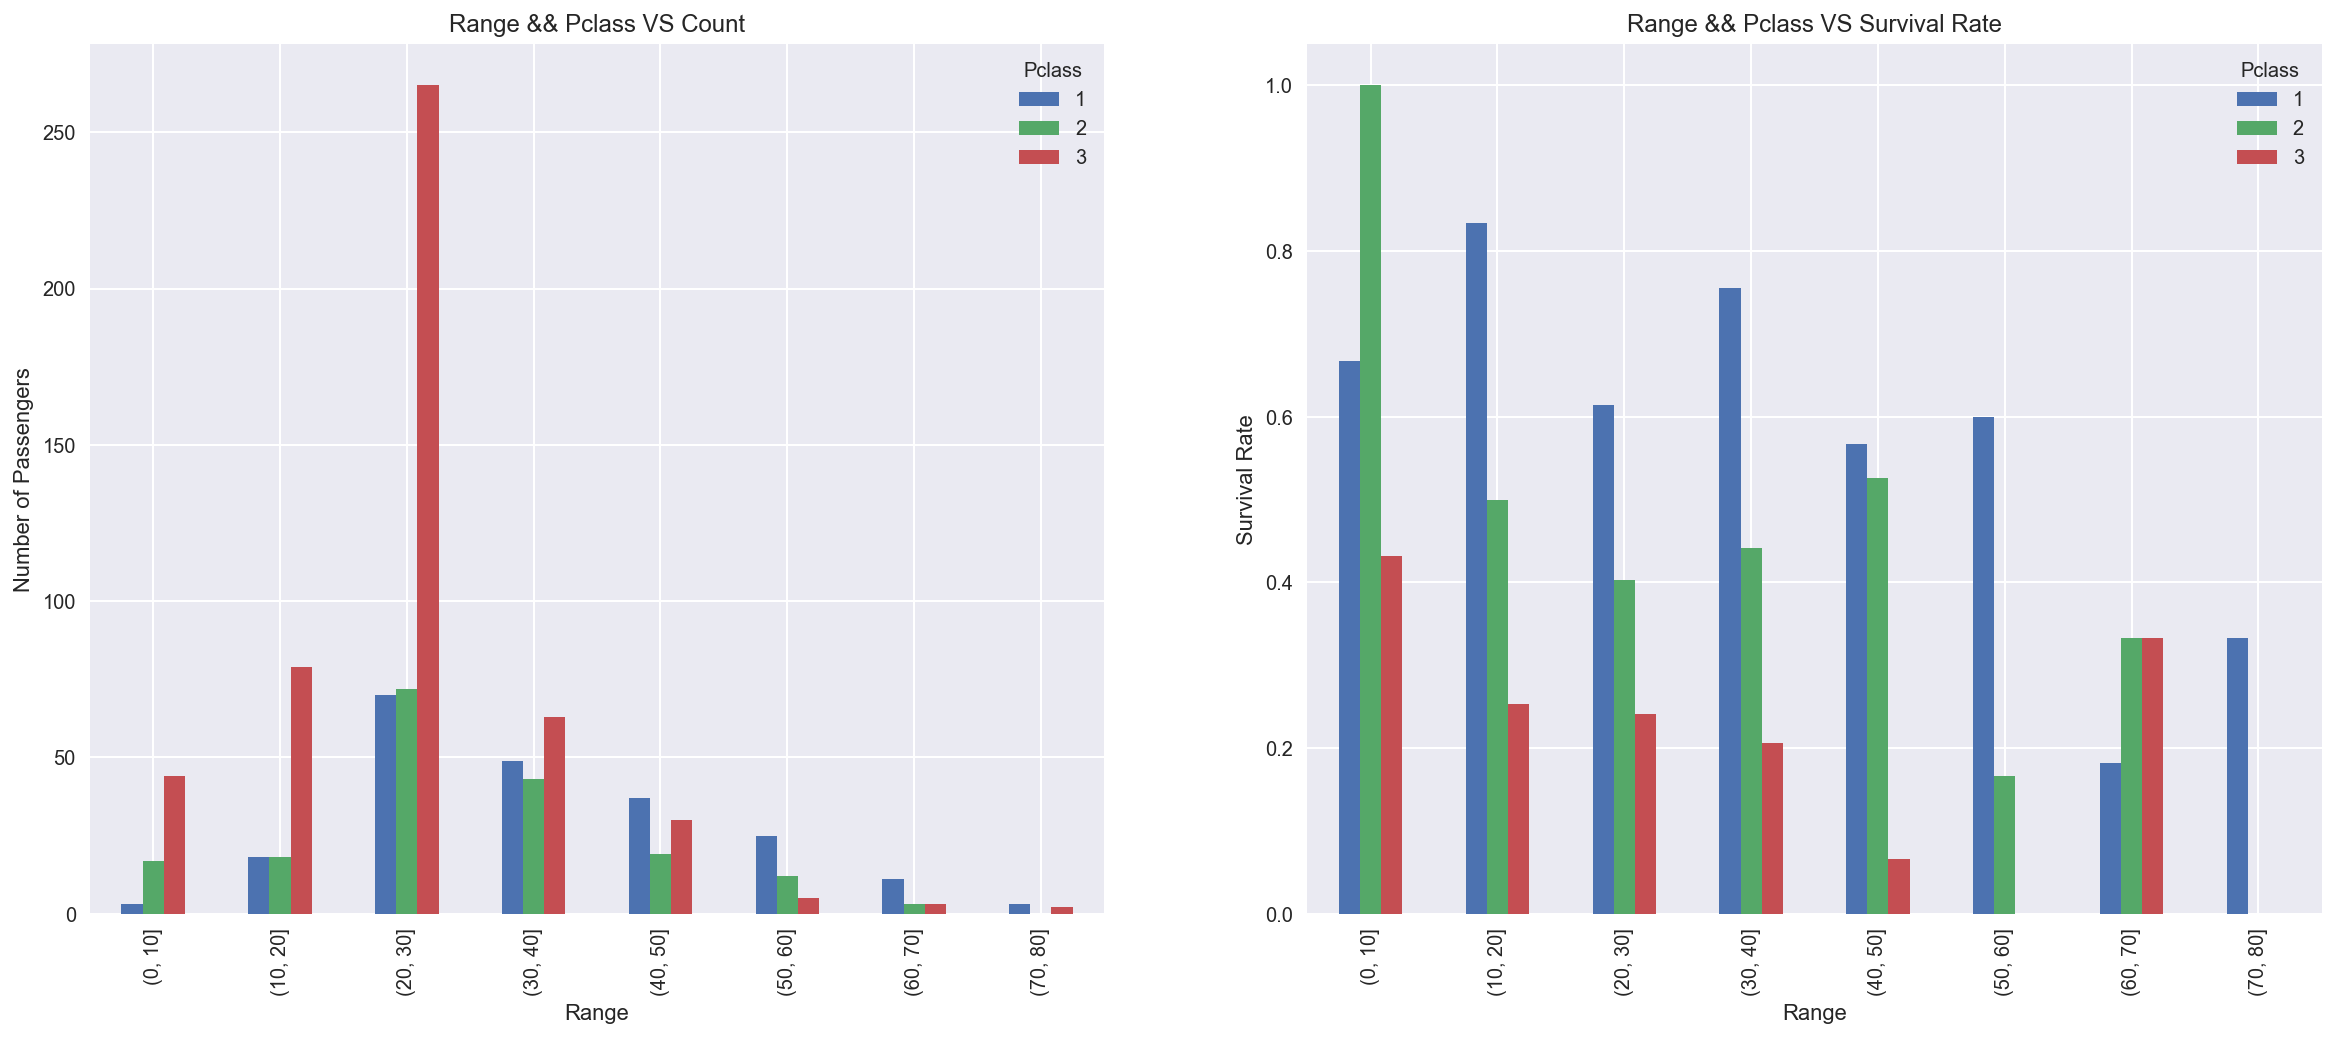

In [16]:
double_variable('Range','Pclass')

如上图所示，整体而言，生还率随着船舱的等级升高而变高（无论年龄阶段），即Survival_rate Pclass 3 < 2 < 1, 在年龄10 - 60岁之前，每组年龄分布中都是Pclass 1 > 2 > 3. 但是有两组数据与上述悖论。年龄在(0-10]岁之间，生还率 Pclass 2 > 1. 年龄 > 70, Pclass = 2 or 3无人生还或者是其实船舱 2、3里无老人。因此需要对这两组数据单独验证：

In [17]:
pclass_1_age_10 = titanic_factors[(titanic_factors['Range'] == '(0 - 10]') & (titanic_factors['Pclass'] == 1)]
pclass_2_age_10 = titanic_factors[(titanic_factors['Range'] == '(0 - 10]') & (titanic_factors['Pclass'] == 2)]
print (pclass_1_age_10)
print (pclass_2_age_10)

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, Range]
Index: []
Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, Range]
Index: []


如上所示，在年龄段为(0-10],Pclass = 1 有3位，其中只有2位生还，而Pclass = 2 中所有的人都生还。因此，Pclass = 2 生还率> 1 

In [18]:
pclass_2_age_70 = titanic_factors[(titanic_factors['Range'] == '(70 - 80]') & (titanic_factors['Pclass'] == 2)]
pclass_2_age_70

,Survived,Pclass,Sex,Age,Range


年龄段> 70岁，Pclass = 2 or 3 生还率为0，其实为该年龄段在船舱2、3无人搭乘

### 3） Age group & Sex 

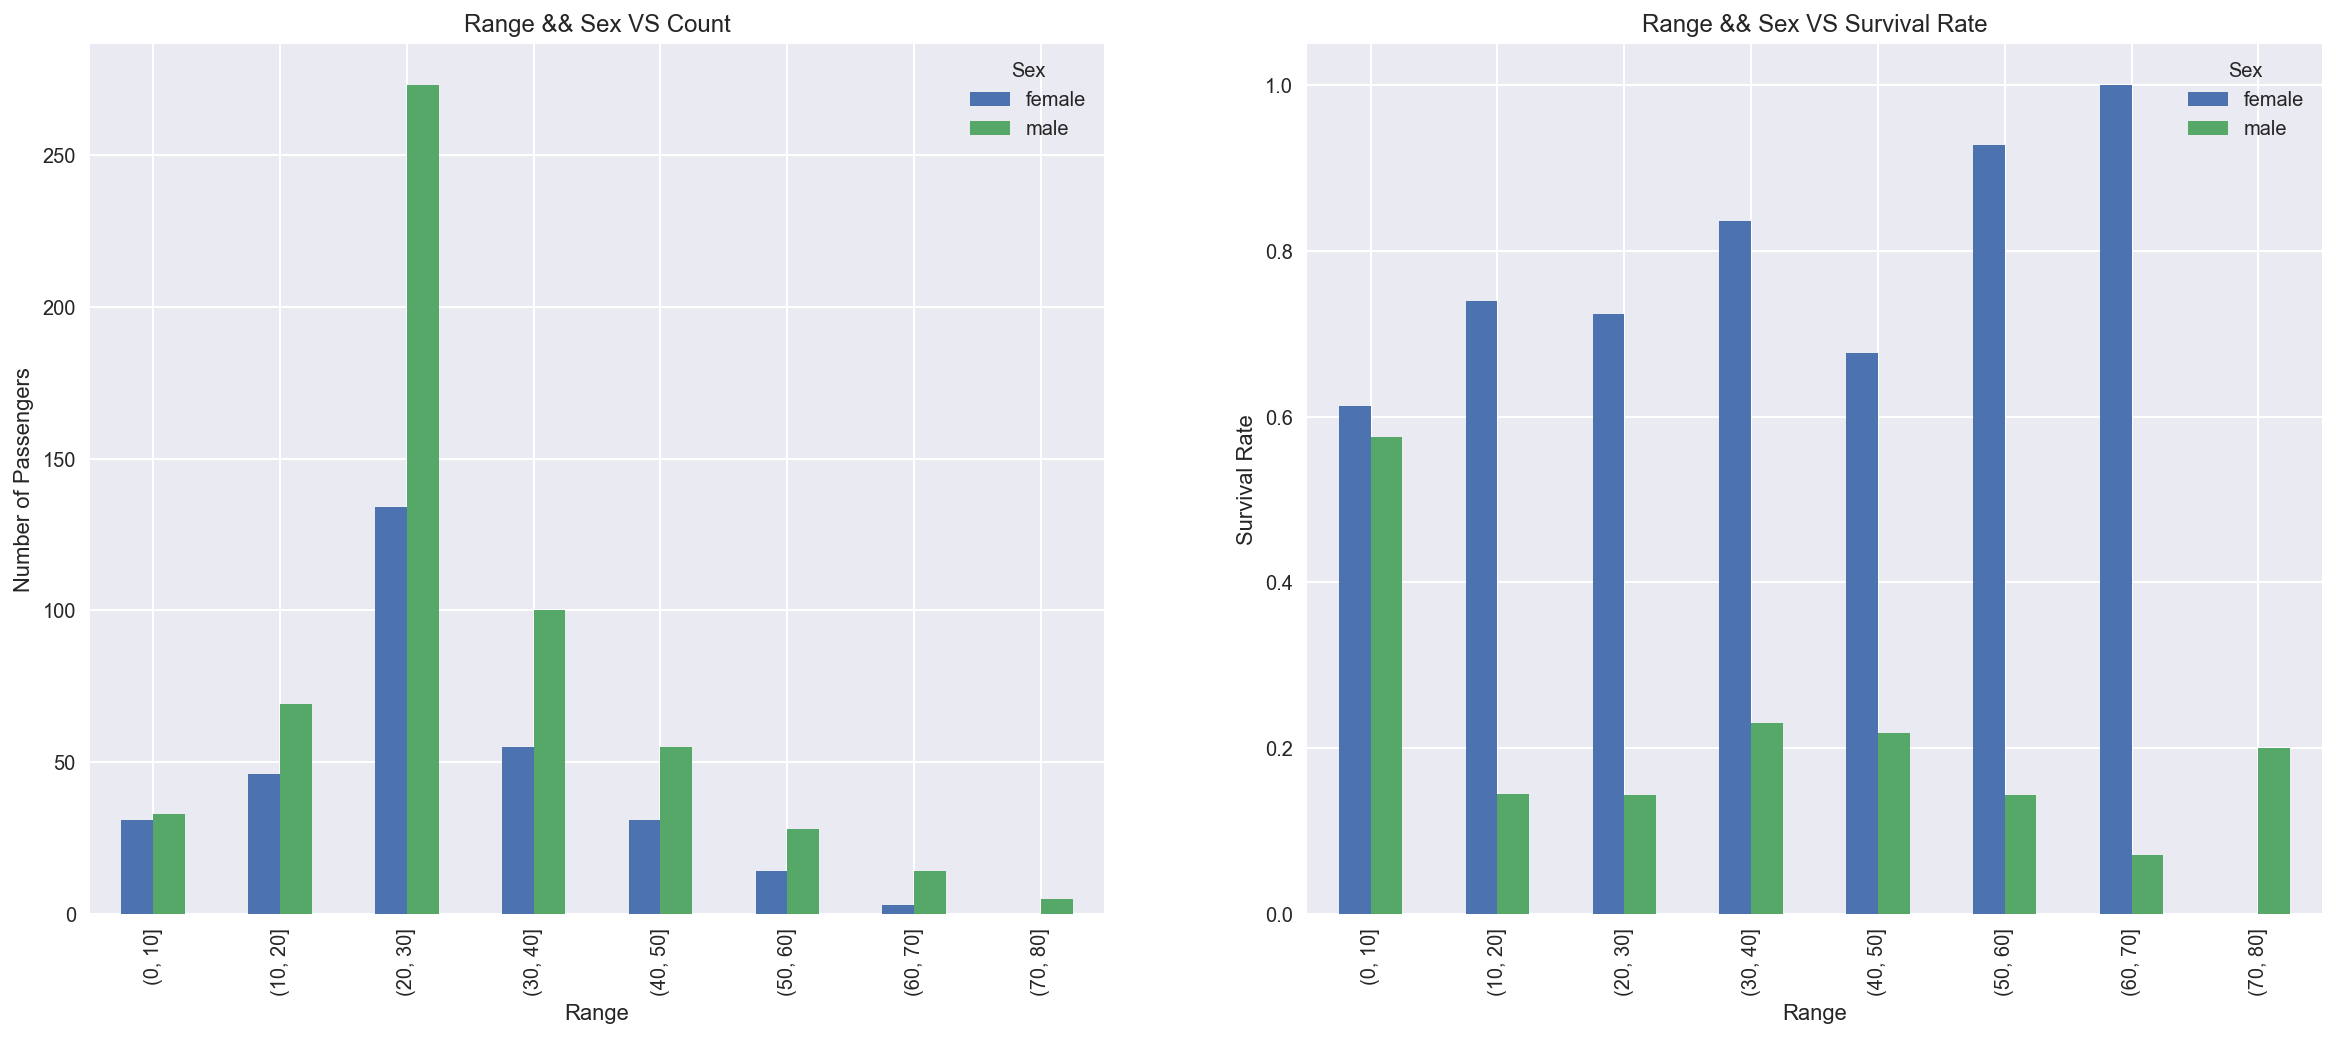

In [19]:
double_variable('Range','Sex')

如上图所示，几乎在各个年龄阶段男性的人数要高于女性，而女性的生还率要远高于男性。但是年龄段70-80之间反常，如上图作左半部分显示，该年龄段的女性并未出现在船上。因此可以推论，在泰坦尼克号事故发生后女性的生还率大于男性。

# 小结 & 结论

综上分析可以看出， Pclass等级越高，生还人数越多，与年龄、性别无关；且女性的生还率要高于男性，无论Pclass或年龄； 相对来说儿童的生还率较高。

# 结论
通过对泰坦尼克号数据集分析，对于问题“:Pclass, Sex, Age是否会影响Titanic生还率？”得出以下结论：
1)Pclass, Sex , Age 是影响titanic生还率的因素； 
2)Pclass等级越高的女性，其生还率是最高的；其次则为儿童, 与性别、舱房等级无关；

但是，由于不清楚样本是否随机选取、样本量不大，而且且样本数据中存在信息缺失，因此无法判断Pclass,Sex,Age与“生还率”的相关性，既是否正相关、负相关或无关无法确定，需要更进一步分析。